In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

f = open("Airplane_Crashes_and_Fatalities_Since_1908.csv", "r")
df = pd.read_csv(f)

In [3]:
print 'data head\n'
print df.head

data head

<bound method DataFrame.head of             Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
5     03/05/1915  01:00                                    Tienen, Belgium   
6     09/03/1915  15:20                              Off Cuxhaven, Germany   
7     07/28/1916    NaN                              Near Jambol, Bulgeria   
8     09/24/1916  01:00                                Billericay, England   
9     10/01/1916  23:45                               Potters Bar, England   
10    11/21/1916    NaN                                     Mainz, Germany   
11    11/28/1916  23:

In [4]:
print 'shape: ' + str(df.shape)

shape: (5268, 13)


In [5]:
df.rename(columns={'Flight #': 'Flight', 'cn/In': 'cnIn'}, inplace=True)
print 'attributes in data set: ' + str(list(df))

attributes in data set: ['Date', 'Time', 'Location', 'Operator', 'Flight', 'Route', 'Type', 'Registration', 'cnIn', 'Aboard', 'Fatalities', 'Ground', 'Summary']


In [6]:
print 'All unique values in columns'
# Date unique useless but still maybe able to use months and years individually
print "Date " + str(pd.unique(df.Date.ravel()))
print "Time " + str(pd.unique(df.Time.ravel()))
print "Location " + str(pd.unique(df.Location.ravel()))
print "Operator " + str(pd.unique(df.Operator.ravel()))
print "Flight # " + str(pd.unique(df.Flight.ravel()))
print "Route " + str(pd.unique(df.Route.ravel()))
print "Type " + str(pd.unique(df.Type.ravel()))
print "Registration " + str(pd.unique(df.Registration.ravel()))
print "cn/In " + str(pd.unique(df.cnIn.ravel()))
print "Aboard " + str(pd.unique(df.Aboard.ravel()))
print "Fatalities " + str(pd.unique(df.Fatalities.ravel()))
print "Ground " + str(pd.unique(df.Ground.ravel()))
# Summary unique useless but still
print "Summary " + str(pd.unique(df.Summary.ravel()))

All unique values in columns
Date ['09/17/1908' '07/12/1912' '08/06/1913' ..., '06/01/2009' '06/07/2009'
 '06/08/2009']
Time ['17:18' '06:30' nan ..., '01:25' '03:57' '15:32']
Location ['Fort Myer, Virginia' 'AtlantiCity, New Jersey'
 'Victoria, British Columbia, Canada' ...,
 'AtlantiOcean, 570 miles northeast of Natal, Brazil'
 'Near Port Hope Simpson, Newfoundland, Canada'
 'State of Arunachal Pradesh, India']
Operator ['Military - U.S. Army' 'Military - U.S. Navy' 'Private' ...,
 'Aerotuy airline' 'Bako Air' 'Strait Air']
Flight # [nan '-' '7' '599' '6' '4' '1' '14' '34' '23' '15A' 'LZ 129' '2' '8' '9'
 '229' '19' '16' '21' '203' '5' '3' '71' '7208' '28' '13' 'V-1104' '9035'
 '2L272' '63' '218' '161' '6001' '142' '45' '216' '42' '105' '16B' '6-103'
 '513' '878' '850' '942' '404' '44' '2207' '6963' '665' '521' '605' '410'
 '121' '311' '608' '923' '1629' '10' '009' '572' '611' '700' '4422' '1-10'
 '624' '421' '6427' '100' '897R' '557' '11-8' '537' '157' '500' '307'
 '2501' '903' '32'

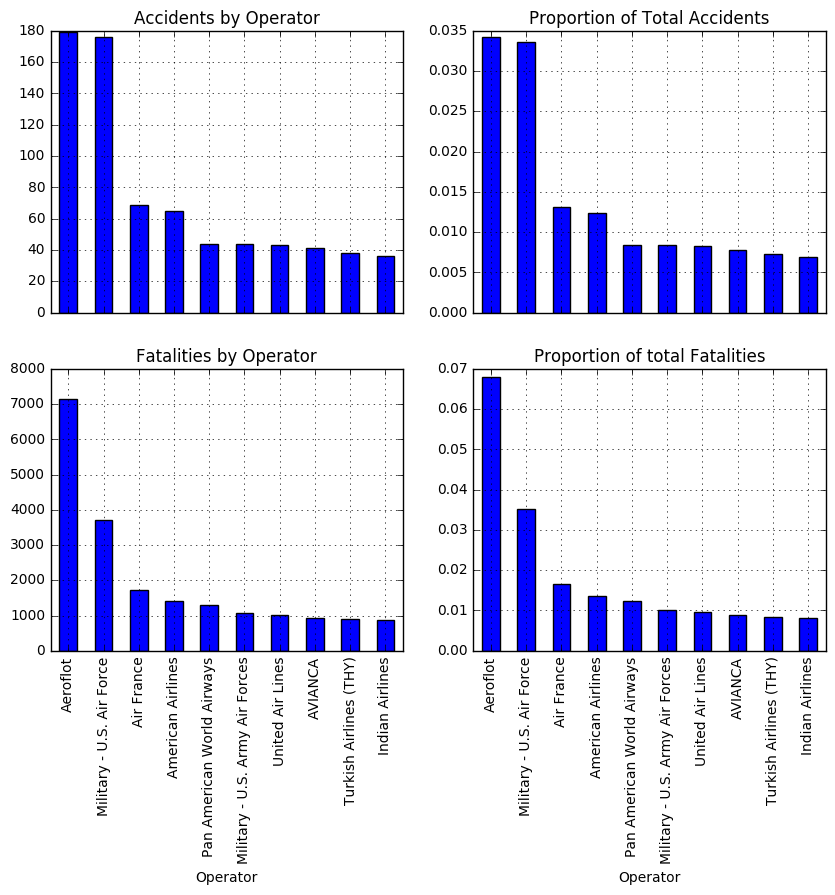

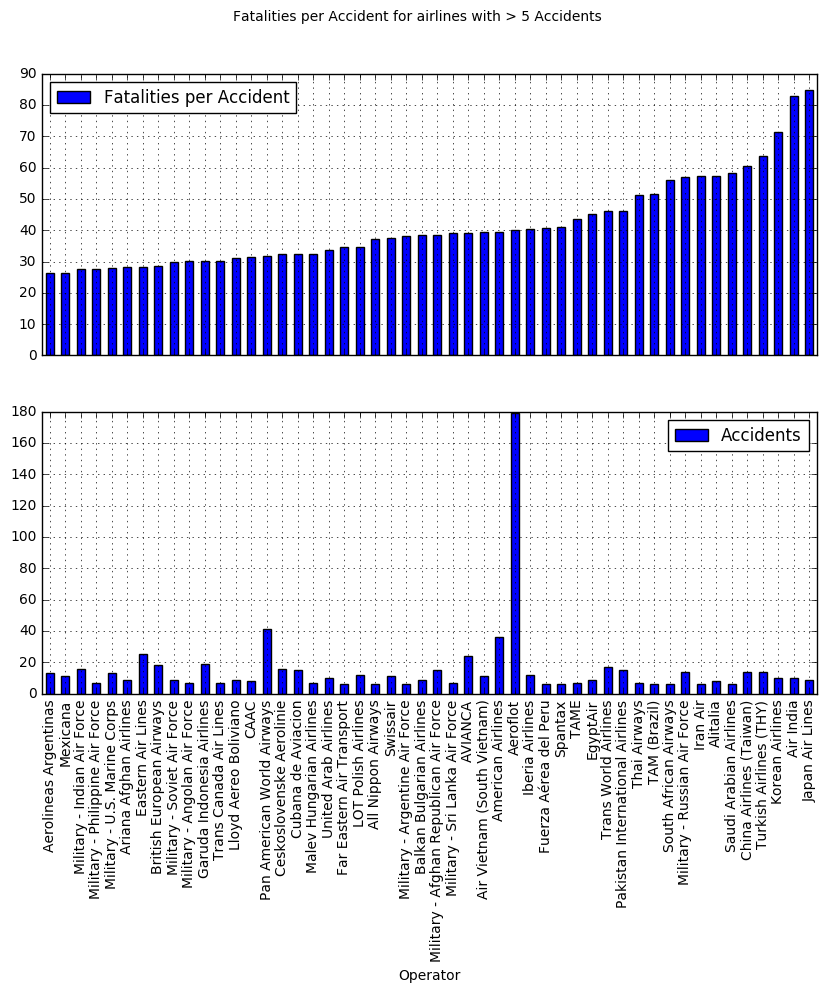

In [7]:
#Accident exploratory analysis, sum and proportion, by operator

operator = df[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

fig_ops,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,sharex=True)
accidents = operator['Fatalities','count'].sort_values(ascending=False)
totalacc = accidents.sum()
accprop = accidents/totalacc
accidents.head(10).plot(kind='bar',title='Accidents by Operator',ax=ax1,grid=True,rot=90)
accprop.head(10).plot(kind='bar',title='Proportion of Total Accidents',ax=ax2,grid=True,rot=90)

fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
fatalities.head(10).plot(kind='bar',title='Fatalities by Operator',ax=ax3,grid=True,rot=90)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal
fatalprop.head(10).plot(kind='bar',title='Proportion of total Fatalities',ax=ax4,grid=True,rot=90)

props = operator['Fatalities'].reset_index()
props['Fatalities per Crash'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 5
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

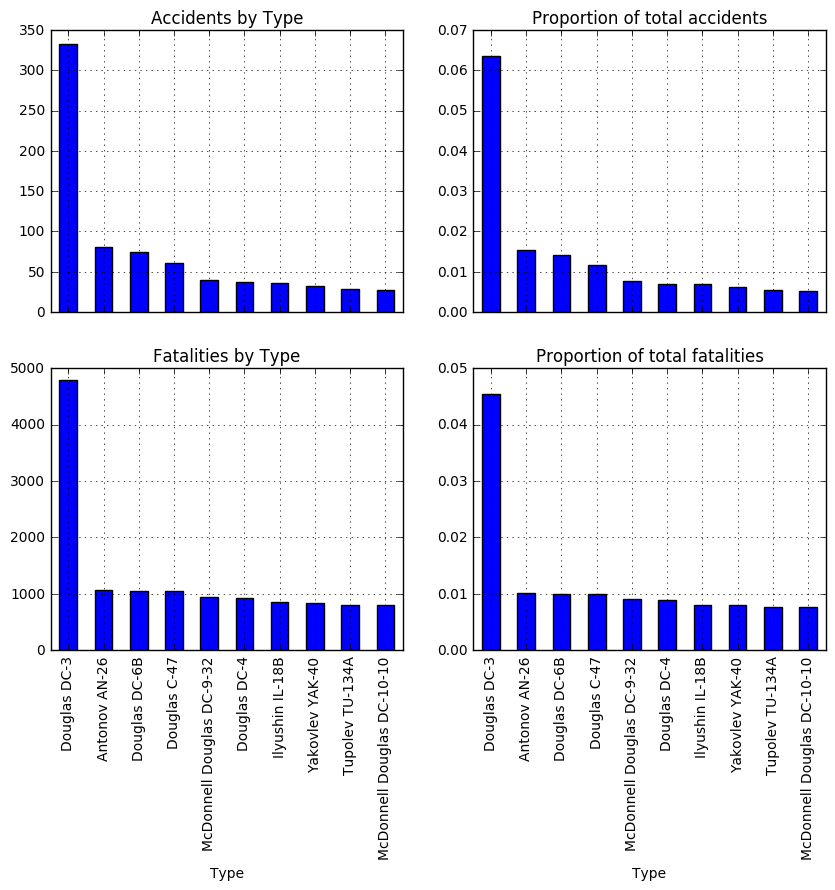

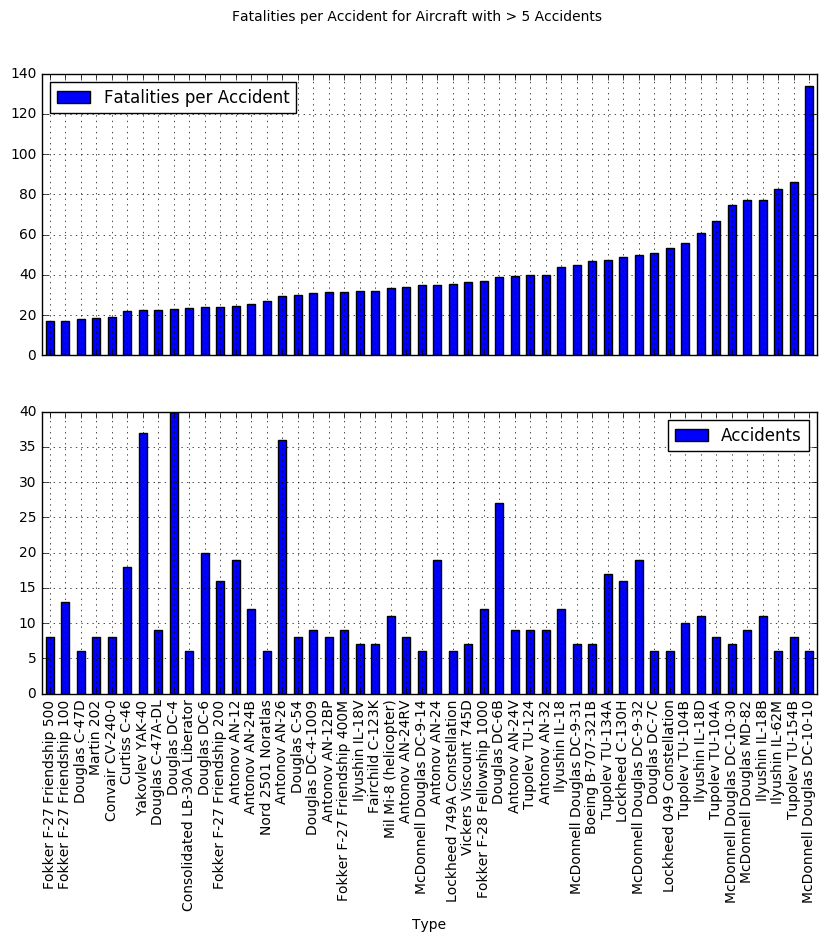

In [8]:
#Accident exploratory analysis, sum and proportion, by type

types = df[['Type','Fatalities']].groupby('Type').agg(['sum','count'])

fig_type,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex = True)
acctype = types['Fatalities','count'].sort_values(ascending=False)
acctype.head(10).plot(kind='bar',title='Accidents by Type',grid=True,ax=ax1,rot=90)
typeprop = acctype/totalacc
typeprop.head(10).plot(kind='bar',title='Proportion of total accidents',grid=True,ax=ax2,rot=90)

fataltype = types['Fatalities','sum'].sort_values(ascending=False)
fataltype.head(10).plot(kind='bar',title='Fatalities by Type',grid=True,ax=ax3,rot=90)
typefatalprop = fataltype/totalfatal
typefatalprop.head(10).plot(kind='bar',title='Proportion of total fatalities',grid=True,ax=ax4,rot=90)

propstype = types['Fatalities'].reset_index()
propstype['Fatalities per Crash'] = propstype['sum']/propstype['count']
propstype.columns = ['Type','Fatalities','Accidents','Fatalities per Accident']


fig_p,(axpt1,axpt2) = plt.subplots(2,1,sharex = True)
minacc = 5
fig_p.suptitle('Fatalities per Accident for Aircraft with > %s Accidents' % minacc)
typestoplot = propstype[propstype['Accidents']>minacc]
typestoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Type'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axpt1
                                                               , kind = 'bar'
                                                               , grid = True)
typestoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Type'
                                                               , y = 'Accidents'
                                                               , ax = axpt2
                                                               , kind = 'bar'
                                                               , grid = True)

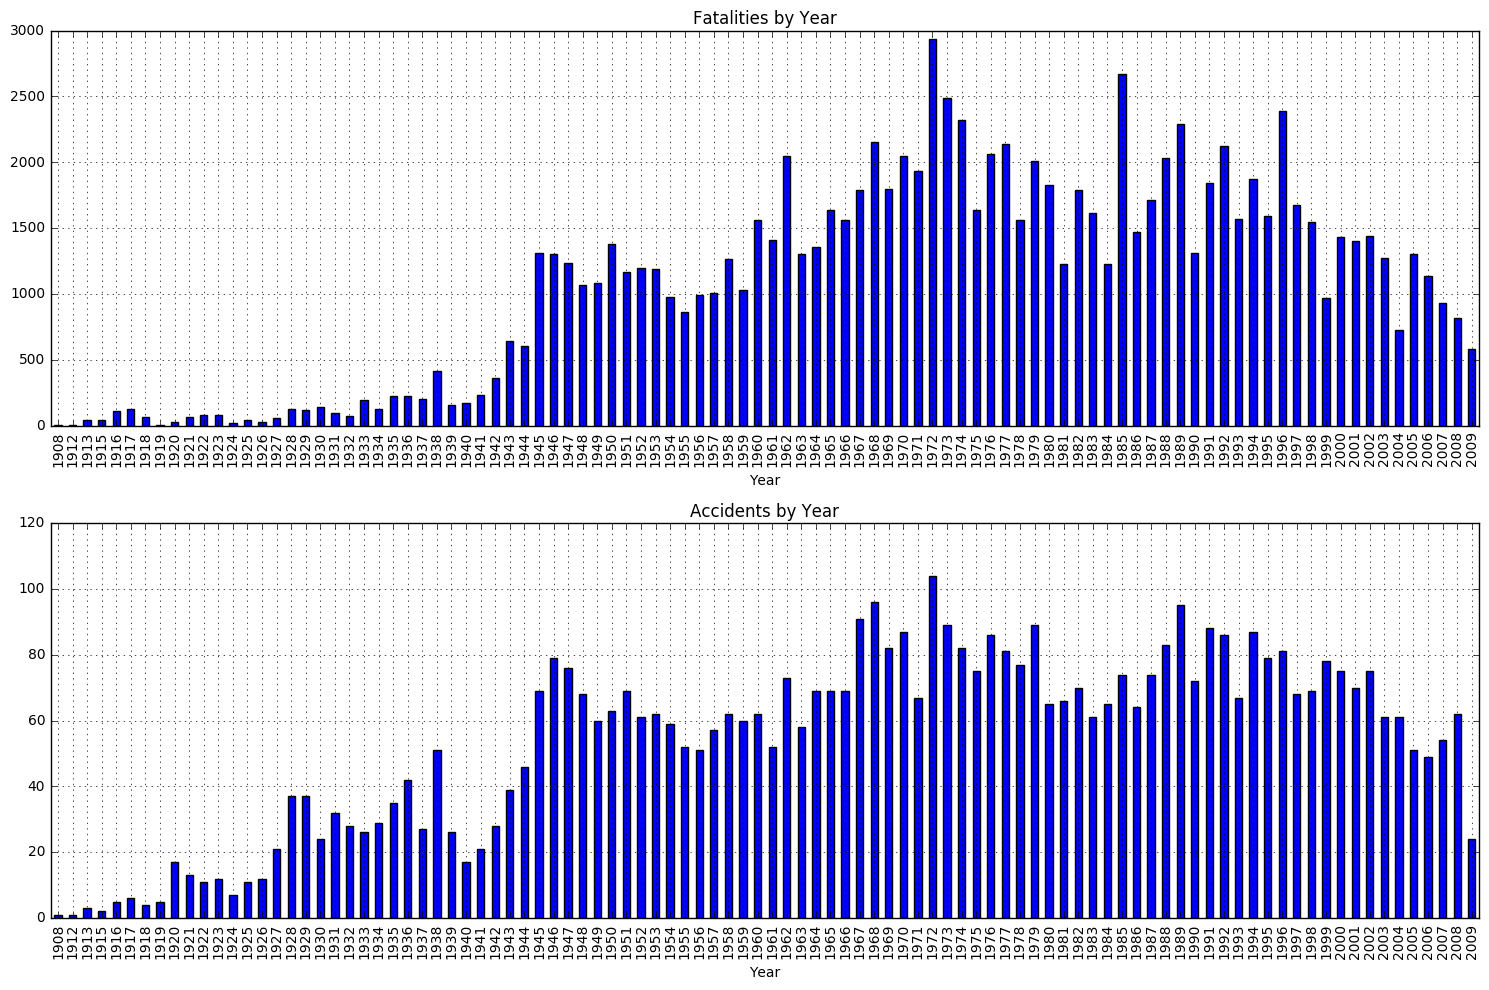

In [9]:
# yearly stats

df['Year'] = df['Date'].apply(lambda x: int(str(x)[-4:]))
yearly = df[['Year','Fatalities']].groupby('Year').agg(['sum','count'])

fig_yearly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
yearly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Year',grid=True,ax=axy1,rot=90)
yearly['Fatalities','count'].plot(kind='bar',title='Accidents by Year',grid=True,ax=axy2,rot=90)
plt.tight_layout()

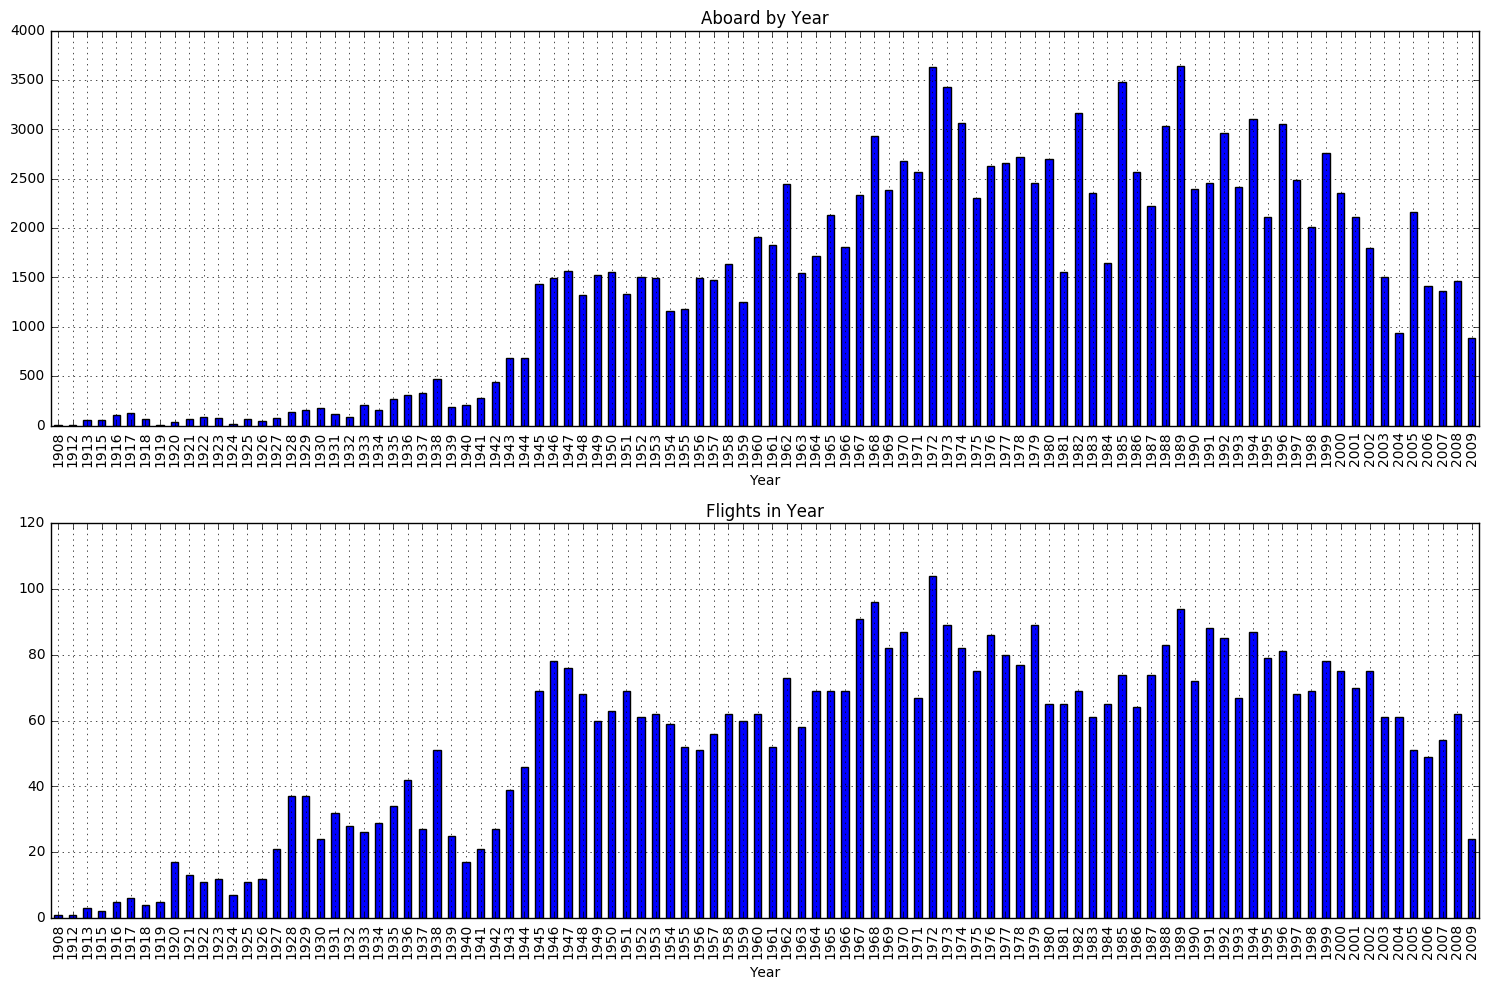

In [10]:
yearly_aboard = df[['Year','Aboard']].groupby('Year').agg(['sum','count'])
fig_yearly_aboard,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
yearly_aboard['Aboard','sum'].plot(kind='bar',title='Aboard by Year',grid=True,ax=axy1,rot=90)
yearly_aboard['Aboard','count'].plot(kind='bar',title='Flights in Year',grid=True,ax=axy2,rot=90)
plt.tight_layout()

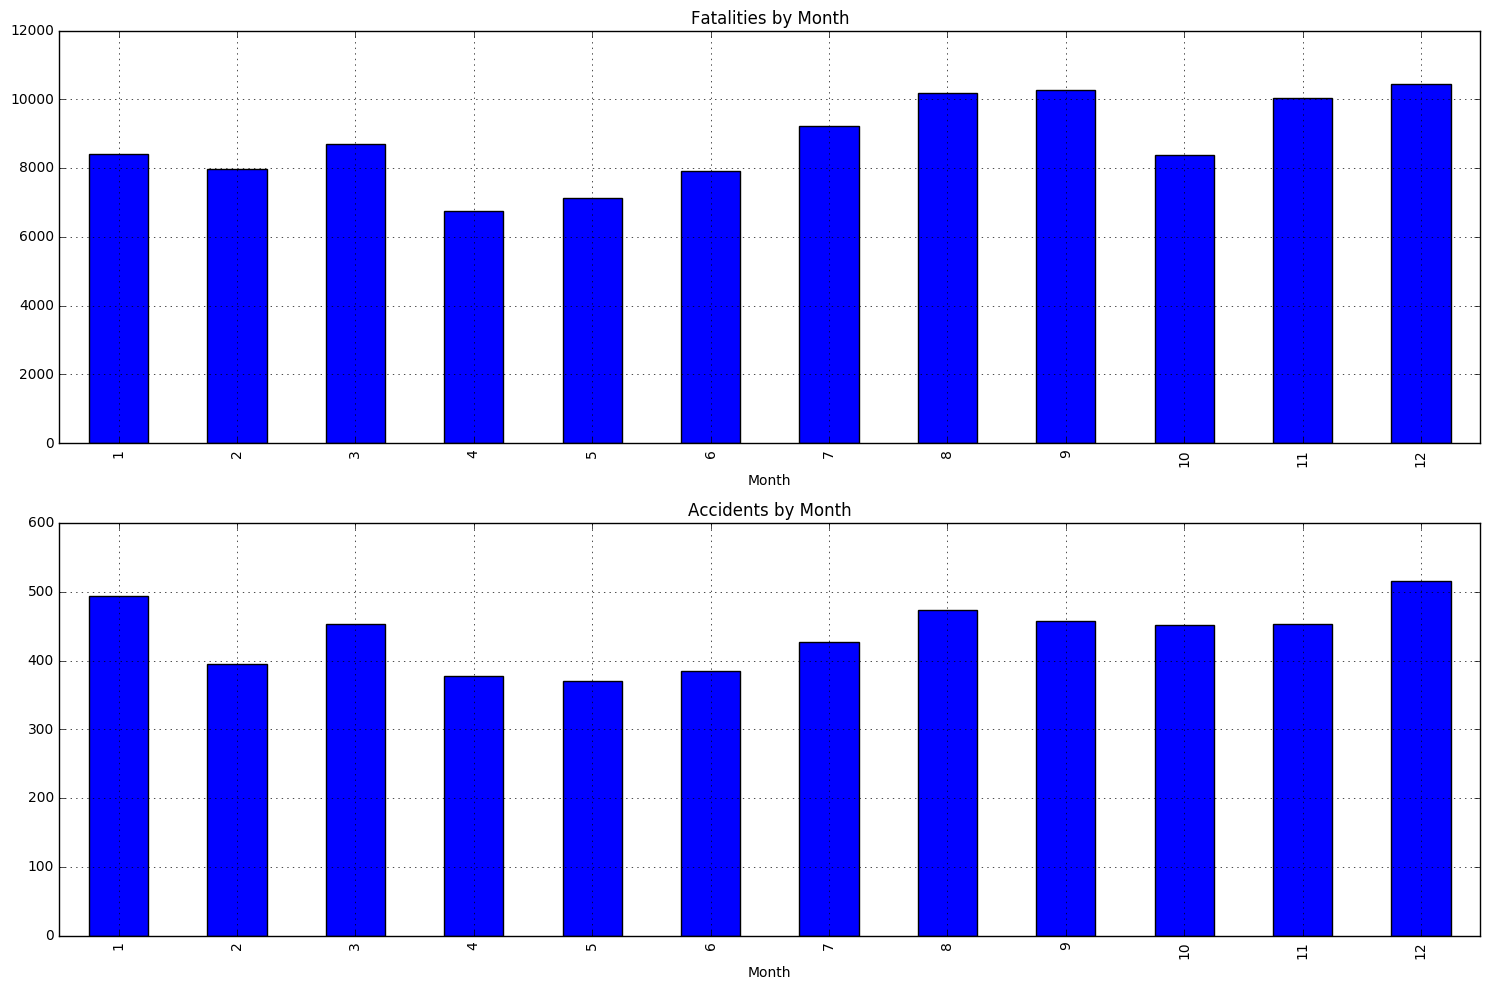

In [11]:
# monthly stats

df['Month'] = df['Date'].apply(lambda x: int(str(x)[0:2]))
monthly = df[['Month','Fatalities']].groupby('Month').agg(['sum','count'])

fig_monthly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
monthly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Month',grid=True,ax=axy1,rot=90)
monthly['Fatalities','count'].plot(kind='bar',title='Accidents by Month',grid=True,ax=axy2,rot=90)
plt.tight_layout()

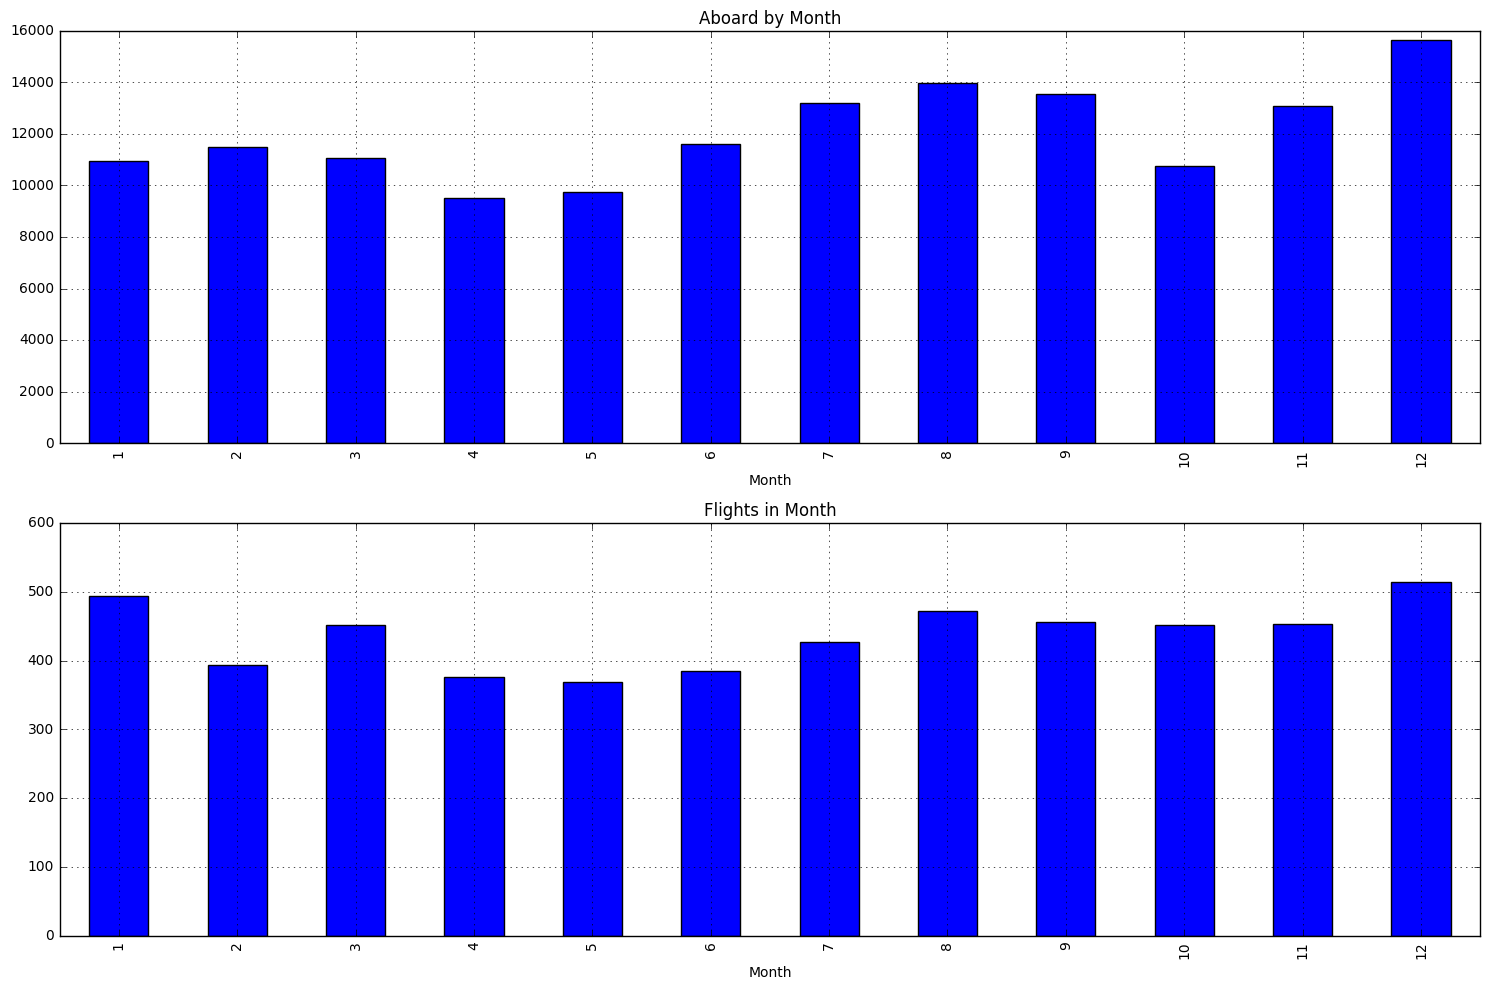

In [12]:
monthly_aboard = df[['Month','Aboard']].groupby('Month').agg(['sum','count'])
fig_monthly_aboard,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
monthly_aboard['Aboard','sum'].plot(kind='bar',title='Aboard by Month',grid=True,ax=axy1,rot=90)
monthly_aboard['Aboard','count'].plot(kind='bar',title='Flights in Month',grid=True,ax=axy2,rot=90)
plt.tight_layout()

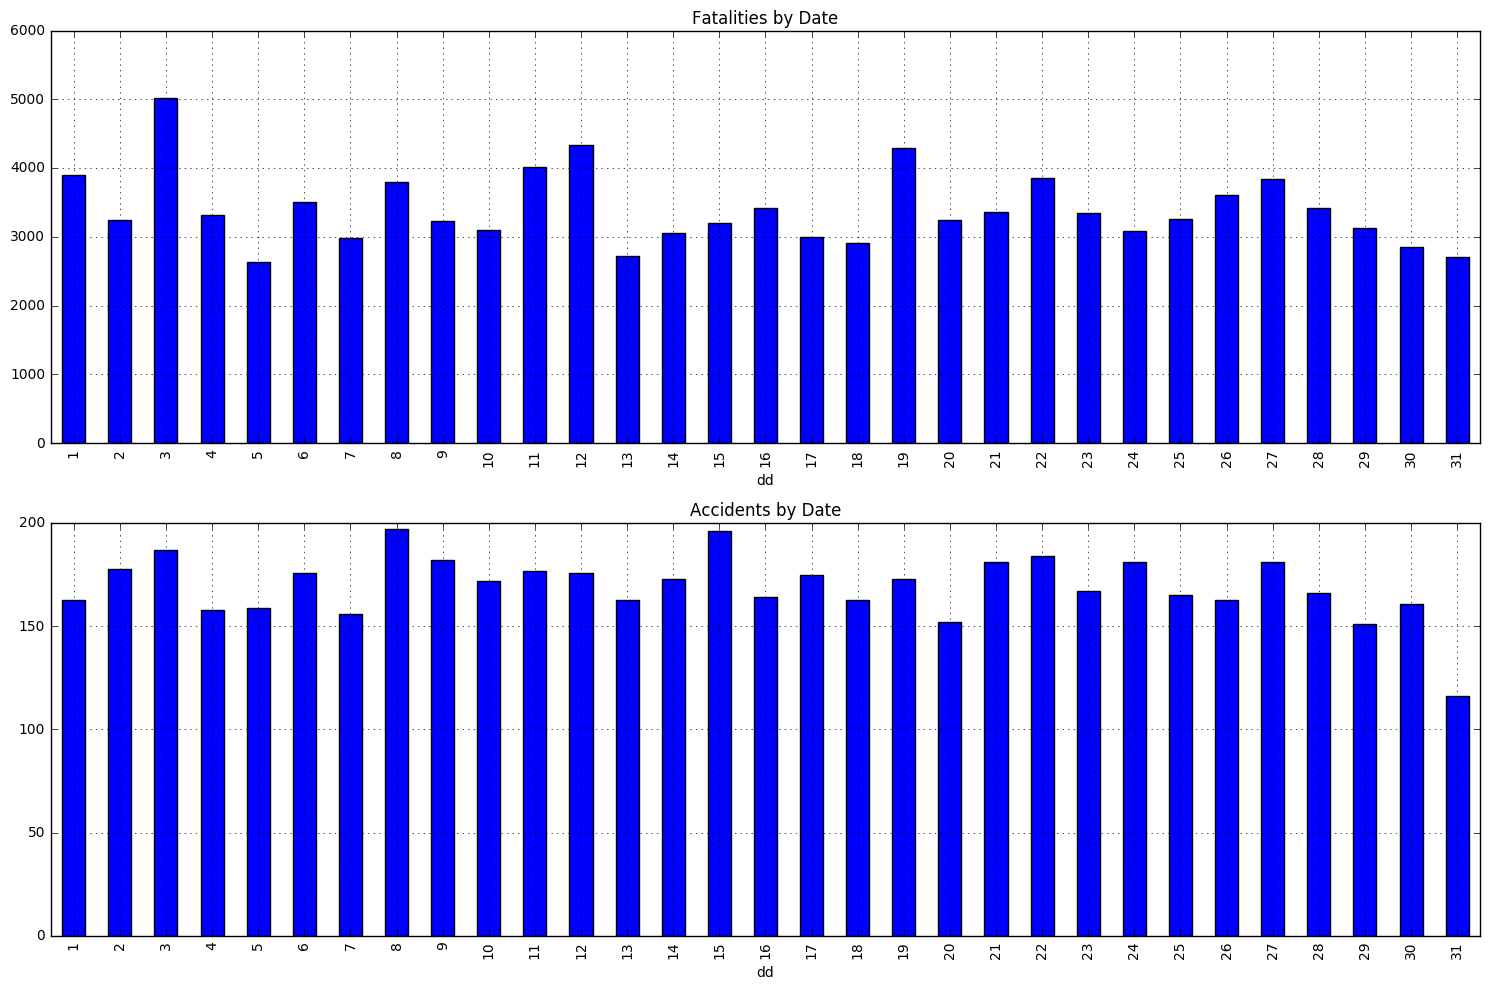

In [17]:
# datewise stats

df['dd'] = df['Date'].apply(lambda x: int(str(x)[3:5]))
dately = df[['dd','Fatalities']].groupby('dd').agg(['sum','count'])

fig_dately,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
dately['Fatalities','sum'].plot(kind='bar',title='Fatalities by Date',grid=True,ax=axy1,rot=90)
dately['Fatalities','count'].plot(kind='bar',title='Accidents by Date',grid=True,ax=axy2,rot=90)
plt.tight_layout()

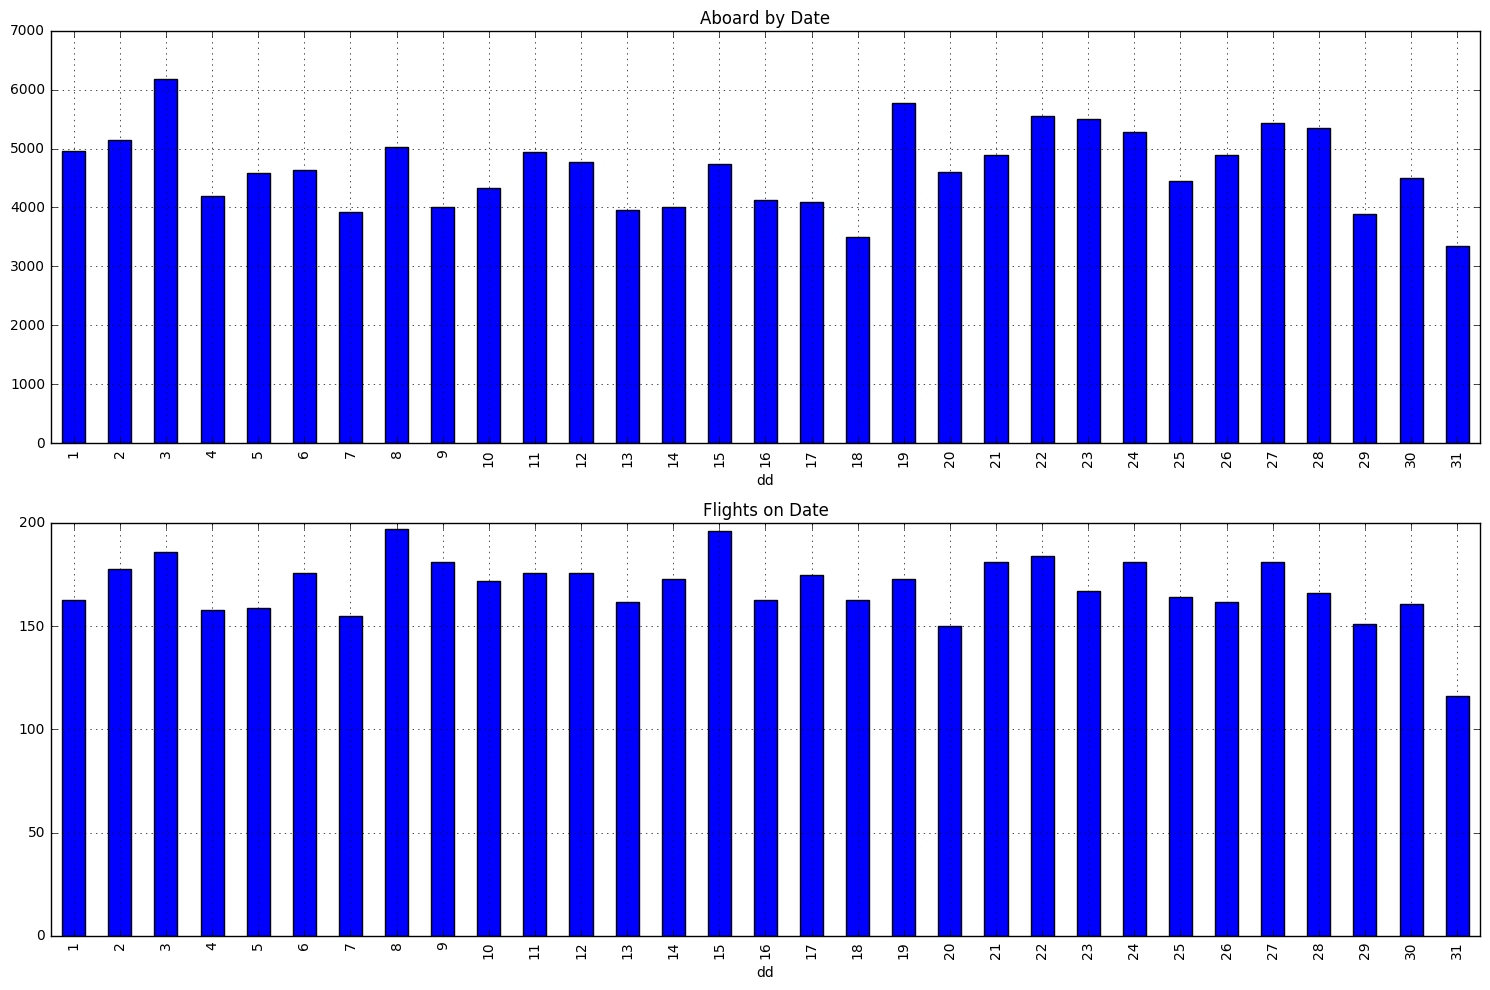

In [18]:
dately_aboard = df[['dd','Aboard']].groupby('dd').agg(['sum','count'])
fig_dately_aboard,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
dately_aboard['Aboard','sum'].plot(kind='bar',title='Aboard by Date',grid=True,ax=axy1,rot=90)
dately_aboard['Aboard','count'].plot(kind='bar',title='Flights on Date',grid=True,ax=axy2,rot=90)
plt.tight_layout()

In [40]:
df['FormattedDate'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['DayIndex'] = df['FormattedDate'].dt.dayofweek
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['DayIndex'].apply(lambda x: day_list[x])

Sunday


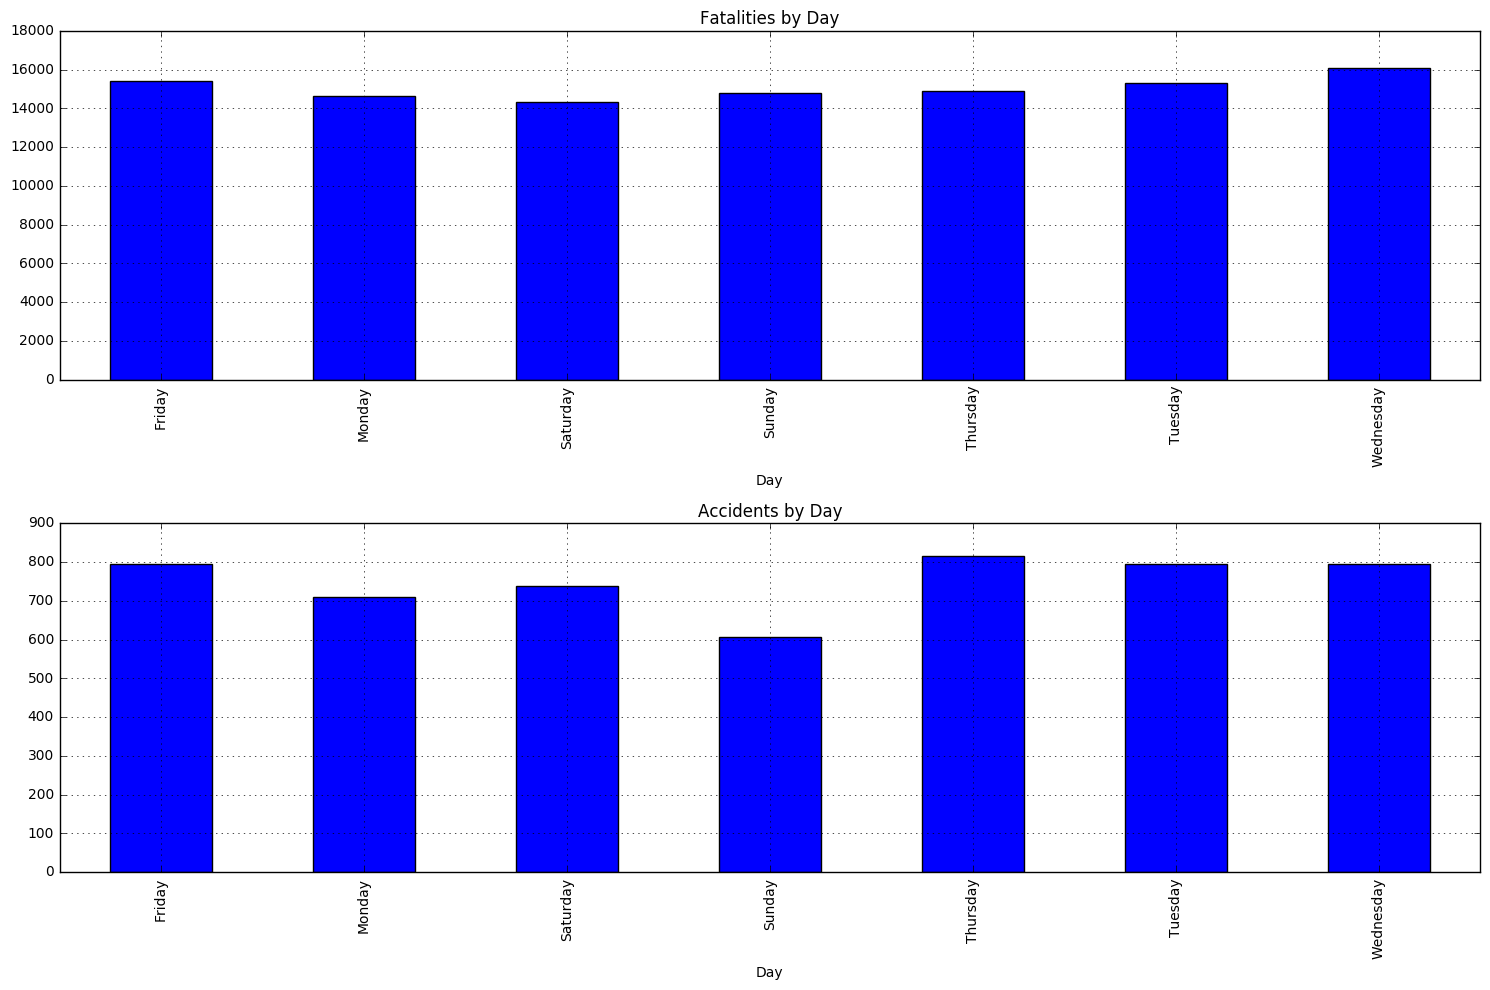

In [41]:
# daywise stats

dayly = df[['Day','Fatalities']].groupby('Day').agg(['sum','count'])

fig_dayly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
dayly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Day',grid=True,ax=axy1,rot=90)
dayly['Fatalities','count'].plot(kind='bar',title='Accidents by Day',grid=True,ax=axy2,rot=90)
plt.tight_layout()

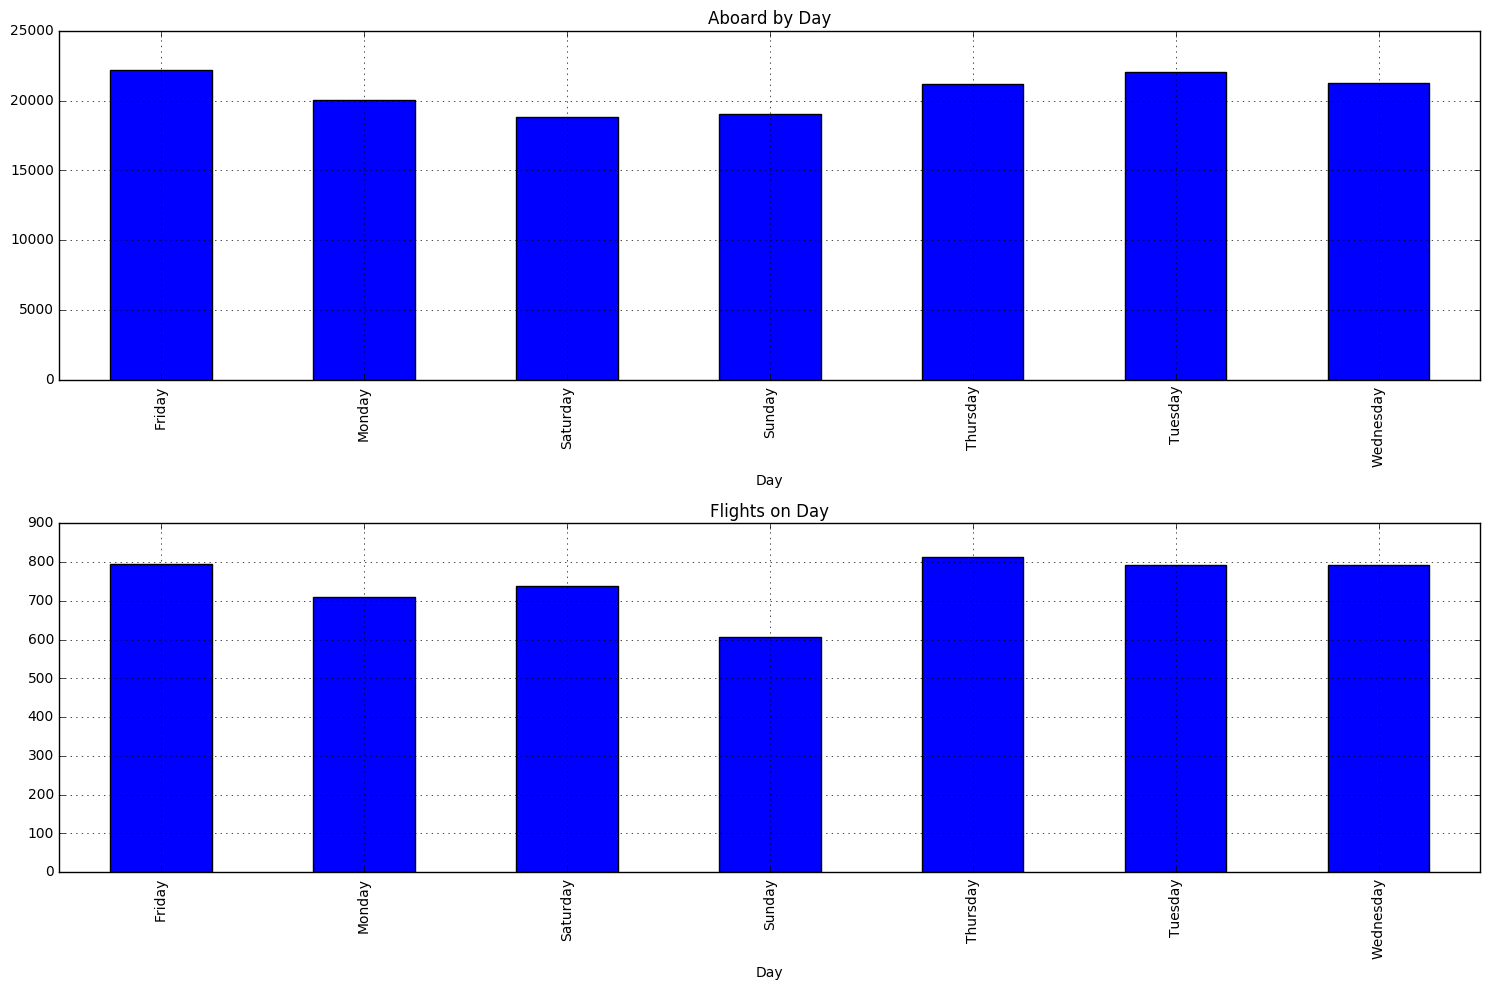

In [42]:
dayly_aboard = df[['Day','Aboard']].groupby('Day').agg(['sum','count'])
fig_dayly_aboard,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
dayly_aboard['Aboard','sum'].plot(kind='bar',title='Aboard by Day',grid=True,ax=axy1,rot=90)
dayly_aboard['Aboard','count'].plot(kind='bar',title='Flights on Day',grid=True,ax=axy2,rot=90)
plt.tight_layout()

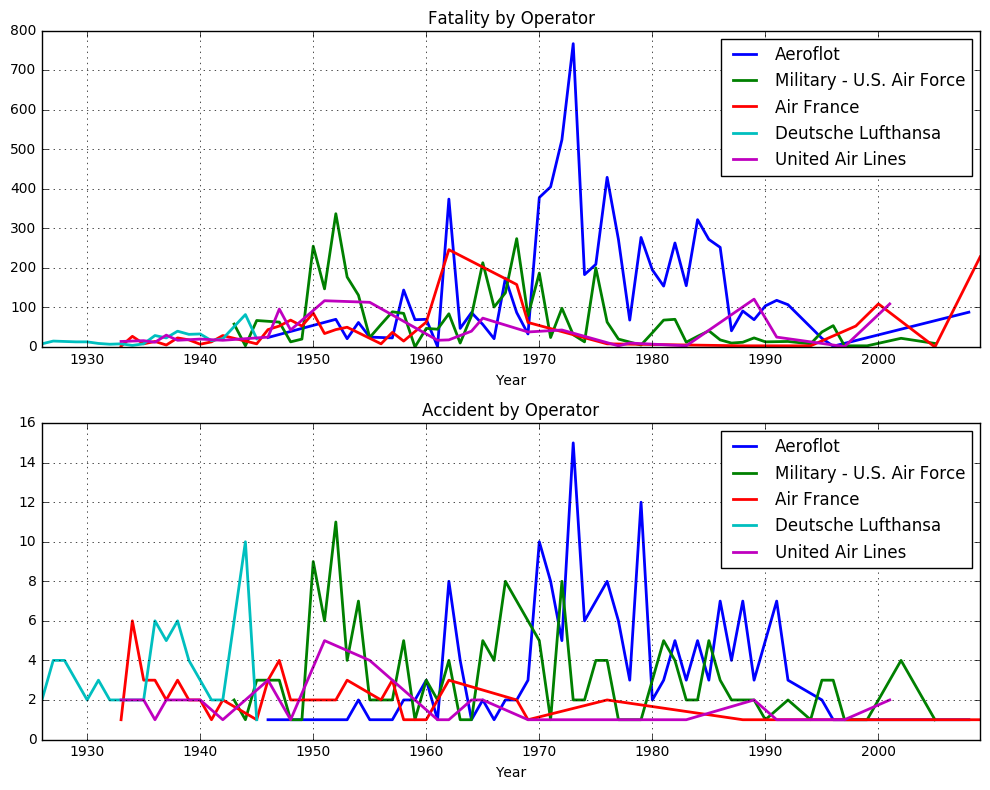

In [13]:
moreOperations = accidents.index.values.tolist()[0:5]
optrend = df[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in moreOperations:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Fatality by Operator')
axtrend[1].set_title('Accident by Operator')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,moreOperations)
axtrend[1].legend(linesA,moreOperations)
plt.tight_layout()

/Users/apple/anaconda2/envs/precog/lib/python2.7/site-packages/ipykernel/__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


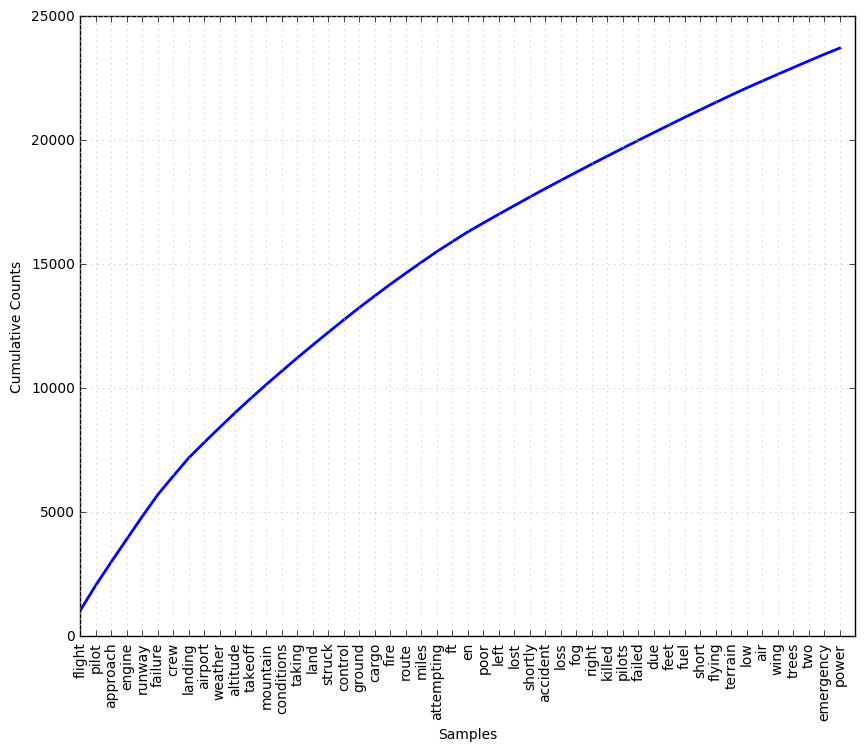

In [14]:
from nltk import FreqDist
from nltk.corpus import stopwords
import string

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

t = df[['Summary','Fatalities']].dropna()
book = t['Summary'].str.lower().apply(remove_punctuation).str.split().values.sum()
wrd = [w for w in book if w not in stop]

# frequency of occurence of certain words in summary
fdist = FreqDist(wrd)
fdist.plot(50,cumulative = True)

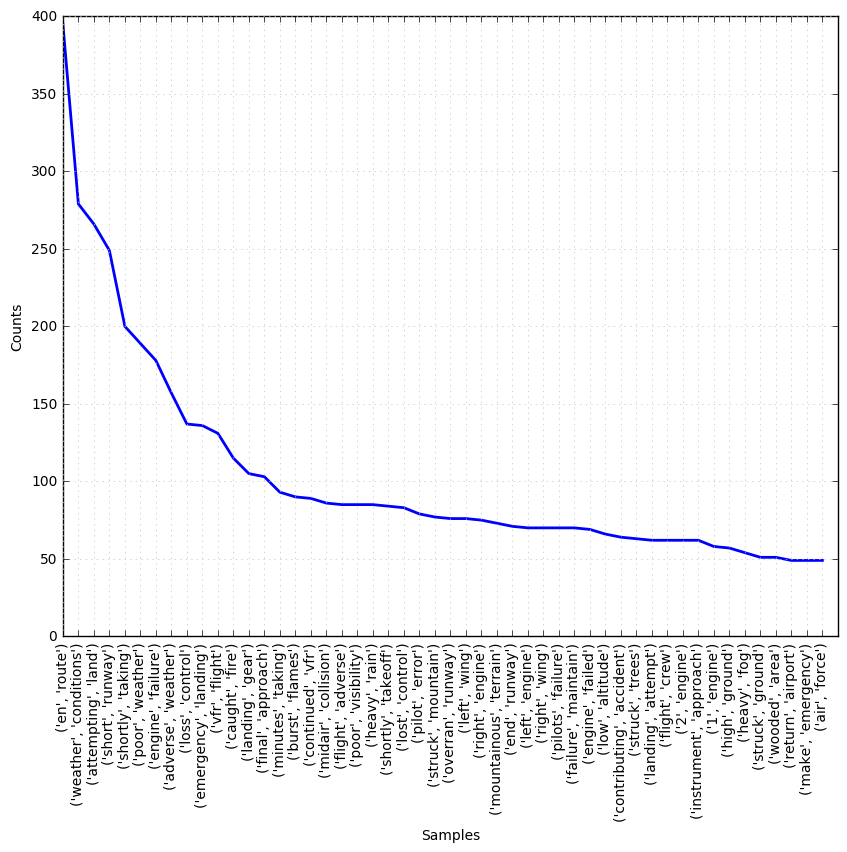

In [15]:
from nltk import bigrams

bigrams = list(bigrams(wrd))
# frequency of occurence of certain word pairs in summary
fdistBigram = FreqDist(bigrams)
fdistBigram.plot(50)

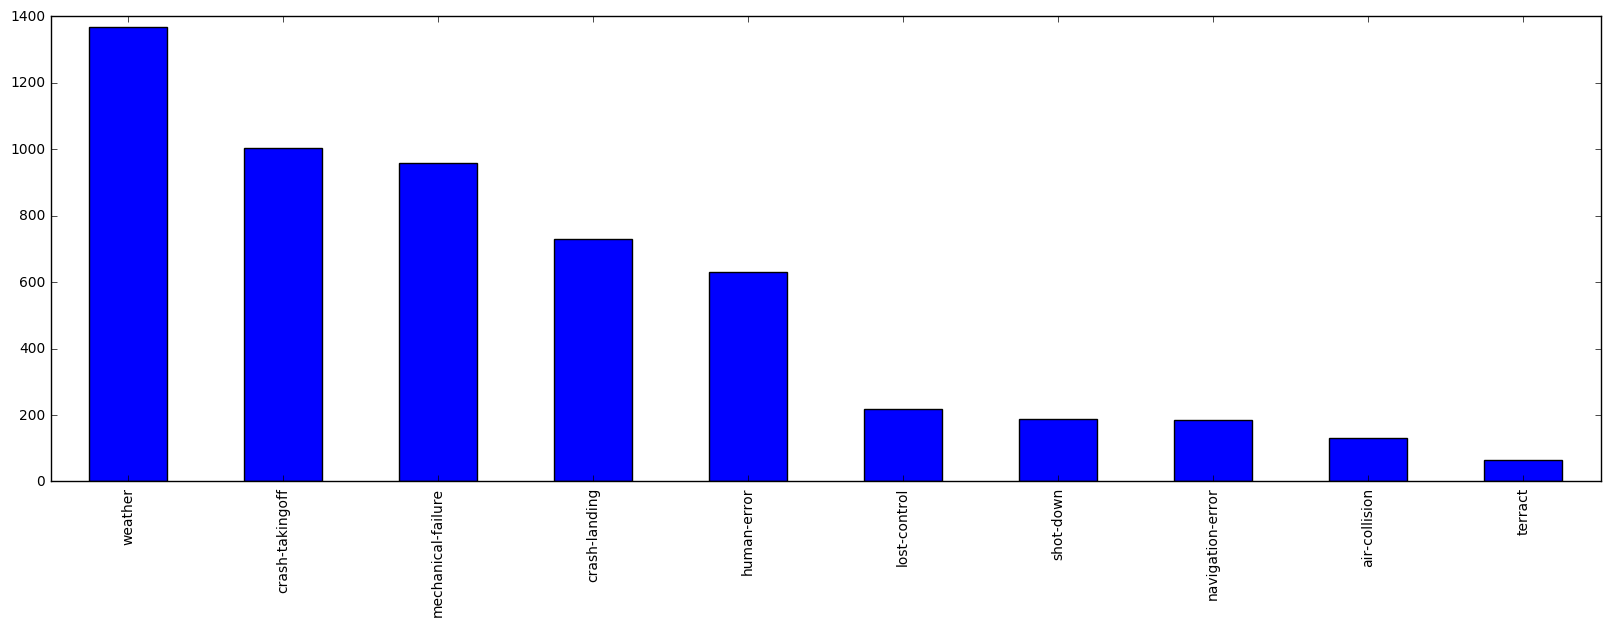

In [16]:
def investigate(s):
    data = {
        'weather': [
            'fog', ' rain', 'unlighted', 'thunder', 'turbulence', 'air pocket', 'adverse weather', 
            'mist', 'weather conditions', 'storm', 'typhoon', 'icing', 'bad weather', 'poor weather',
            'meteorological conditions', 'head wind', 'lightning', 'weather was poor', 'snow',
            'weather related', ' ice'
        ],
        'lost-control': ['disorientation', 'low altitude', 'loss of control'],
        'crash-landing': ['short of the runway', 'attempting to land', 'on approach', 'final approach'],
        'crash-takingoff': ['taking off', 'takeoff', 'take off'],
        'air-collision': ['mid-air', 'in-flight collision', 'midair', 'planes collided'],
        'shot-down': ['shot down', 'missile', 'rebel', 'fighter'],
        'mechanical-failure': [
            'engine', 'propeller', 'mechanical failure', 'rotor', 'out of fuel', 'system failure', 'component failure',
            'fatigue'
        ],
        'navigation-error': [
            'navigational error', 'disoriented', 'altimiter', 'poor visibility', 'altimeter',
            'compass', 'gyros', 'navigational equipment', 'erroneous navigation'
        ],
        'human-error': [
            'failure of the crew', 'pilot error', 'did not follow', 'crew ignored', 'failure to', 
            'delayed landing', 'overloaded', 'misinterpretation', 'misjudge', 'failed to', 'lost control', 
            'inadequate risk', 'improper use', 'midjudge', 'poor crew'
        ],
        'terract': ['bomb', 'hijacker']
    }

    res = []
    for el, words in data.iteritems():
        res += [el for word in words if word in s]

    return list(set(res))

df['Summary'].fillna('', inplace=True)
all_values = []
for s in df['Summary']:
    all_values += investigate(s.lower())

plt.figure(figsize=(20, 6))
pd.DataFrame(all_values)[0].value_counts().plot('bar')

In [ ]:
print df['Time'][3]
# hourly stats
df['Hour'] = df['Time'].apply(lambda x: int(str(x)[0:2]))
hourly = df[['Hour','Fatalities']].groupby('Hour').agg(['sum','count'])
hourly_aboard = df[['Hour','Aboard']].groupby('Hour').agg(['sum','count'])

fig_hourly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
hourly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Hour',grid=True,ax=axy1,rot=90)
hourly['Fatalities','count'].plot(kind='bar',title='Accidents by Hour',grid=True,ax=axy2,rot=90)
plt.tight_layout()